In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
sns.set()

Read data from file

In [2]:
all_tracks_df = pd.read_pickle("../data/spotify_dataset_all.pkl")

In [3]:
all_tracks_df.head()

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1upQiytDIEZfl9ItruoXuC,classical,0.0939,0.03360,2,-24.041,0,0.0606,0.927,0.830,0.0954,0.0516,67.359,207267,3
5bu9A6uphPWg39RC3ZKeku,classical,0.4540,0.01390,4,-29.966,0,0.0514,0.995,0.943,0.0736,0.2440,130.253,184853,4
3DNRdudZ2SstnDCVKFdXxG,classical,0.1840,0.00527,1,-37.264,0,0.0432,0.995,0.887,0.1730,0.1510,170.612,315427,3
67TCAXIe154ZGDNaWceqxC,classical,0.1590,0.04010,7,-27.516,1,0.0446,0.984,0.760,0.1560,0.1060,106.239,462627,4
1Oo7XEqkrwifJn17aA0ocF,classical,0.2990,0.00626,9,-30.923,1,0.0478,0.994,0.901,0.0823,0.0634,69.043,378733,4


Normalise values

In [4]:
normalised_vals_df = all_tracks_df.loc[:, all_tracks_df.columns != 'genre']
normalised_vals_df = (normalised_vals_df - normalised_vals_df.min())/(normalised_vals_df.max() - normalised_vals_df.min())
all_tracks_df = pd.merge(all_tracks_df[['genre']], normalised_vals_df, left_index=True, right_index=True)
all_tracks_df.head()

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1upQiytDIEZfl9ItruoXuC,classical,0.035683,0.032810,0.181818,0.441113,0.0,0.101165,0.930723,0.845214,0.084732,0.029023,0.148602,0.084694,0.50
5bu9A6uphPWg39RC3ZKeku,classical,0.426247,0.013053,0.363636,0.308423,0.0,0.076801,0.998996,0.960285,0.062150,0.229169,0.521763,0.062907,0.75
3DNRdudZ2SstnDCVKFdXxG,classical,0.133406,0.004398,0.090909,0.144985,0.0,0.055085,0.998996,0.903259,0.165113,0.132425,0.761220,0.189824,0.50
67TCAXIe154ZGDNaWceqxC,classical,0.106291,0.039328,0.636364,0.363290,1.0,0.058792,0.987952,0.773931,0.147504,0.085613,0.379284,0.332902,0.75
1Oo7XEqkrwifJn17aA0ocF,classical,0.258134,0.005391,0.818182,0.286991,1.0,0.067267,0.997992,0.917515,0.071162,0.041298,0.158594,0.251357,0.75


Change all genres except RnB to other

In [5]:
all_tracks_df.loc[all_tracks_df['genre'] != 'rnb', 'genre'] = 'other'

Look at genre distribution

<AxesSubplot:ylabel='genre'>

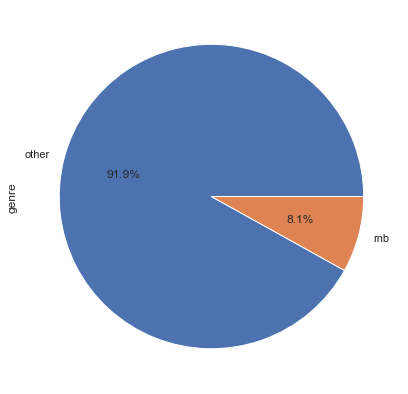

In [6]:
all_tracks_df['genre'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(7,7))

In [7]:
all_tracks_df['genre'].value_counts()

other    6074
rnb       533
Name: genre, dtype: int64

Resample data

In [8]:
pop_sample_df = all_tracks_df.loc[all_tracks_df['genre'] == 'rnb'].sample(n=530, random_state=1)
other_sample_df = all_tracks_df.loc[all_tracks_df['genre'] == 'other'].sample(n=530, random_state=1)
resampled_tracks_df = pd.concat([pop_sample_df, other_sample_df])
resampled_tracks_df

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
3TkNsftUBh8dwwLUHpmYNC,rnb,0.706074,0.658013,0.909091,0.847647,0.0,0.335275,0.057929,0.000000,0.228299,0.429939,0.330359,0.125815,0.75
5S0cvScXb33JVpjTiY9Ivi,rnb,0.799349,0.480501,0.000000,0.854903,1.0,0.013771,0.247989,0.000000,0.231407,0.644232,0.391162,0.131673,0.75
6mZI2vbLv1UvlclwDQ4uvc,rnb,0.690889,0.663028,0.636364,0.800417,0.0,0.168697,0.569276,0.000001,0.076652,0.823156,0.589478,0.158987,0.75
741OE401HO7ZCaPhEqCZ7w,rnb,0.347072,0.289952,0.727273,0.740286,1.0,0.029661,0.664658,0.000015,0.095712,0.132425,0.421285,0.116808,0.75
1Dx8rIZaXzZPvUQRF2j9hB,rnb,0.571584,0.522623,0.818182,0.839451,0.0,0.042108,0.233933,0.000000,0.234514,0.582857,0.140681,0.165693,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1aPqexHVW20OTamBHdWWVL,other,0.967462,0.652999,1.000000,0.886368,0.0,0.165519,0.004575,0.000000,0.015641,0.734734,0.478712,0.092003,0.75
0S8mtofOXVslUNzpHLuPW0,other,0.526030,0.699132,0.000000,0.874745,1.0,0.202066,0.076202,0.000133,0.049410,0.616145,0.178612,0.111416,0.75
5KSJ9k1FYjFLnIRlJT2wF8,other,0.670282,0.509585,0.363636,0.815802,1.0,0.104078,0.085941,0.000000,0.439611,0.530844,0.605047,0.100518,0.75
1VYHeY9ulPnsMHKvXPyG5H,other,0.524946,0.710164,0.727273,0.852709,0.0,0.054025,0.021483,0.000000,0.131966,0.556850,0.490620,0.090425,0.75


<AxesSubplot:ylabel='genre'>

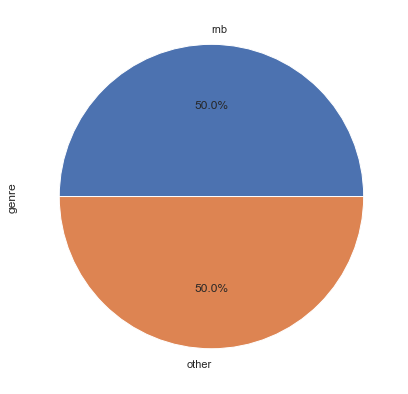

In [9]:
resampled_tracks_df['genre'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(7,7))

See summary statistics

In [10]:
resampled_tracks_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000
mean,0.617783,0.585241,0.500515,0.793671,0.567925,0.187097,0.258942,0.065015,0.156705,0.501099,0.447547,0.127206,0.735849
std,0.180120,0.209945,0.327300,0.106827,0.495599,0.225198,0.282992,0.214065,0.134635,0.248461,0.169425,0.076936,0.084367
min,0.007267,0.004317,0.000000,0.120350,0.000000,0.000000,0.000062,0.000000,0.009115,0.009050,0.050515,0.009992,0.000000
25%,0.514100,0.458438,0.181818,0.763123,0.000000,0.041049,0.039179,0.000000,0.075590,0.313430,0.315219,0.082143,0.750000
50%,0.644252,0.592324,0.545455,0.816429,1.000000,0.082892,0.151604,0.000002,0.105034,0.507958,0.440888,0.116665,0.750000
75%,0.741052,0.736740,0.750000,0.857552,1.000000,0.245233,0.388803,0.000472,0.184017,0.700666,0.544164,0.153018,0.750000
max,0.978308,0.995988,1.000000,0.999171,1.000000,0.994703,0.998996,0.975560,0.908846,0.986477,0.958497,0.936444,1.000000


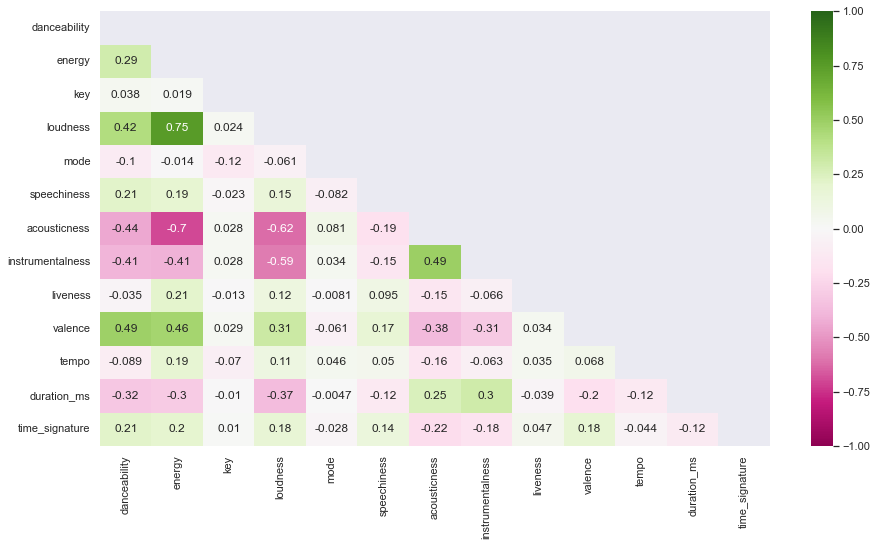

In [11]:
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(resampled_tracks_df.corr(), dtype=bool))
sns.heatmap(resampled_tracks_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap="PiYG");

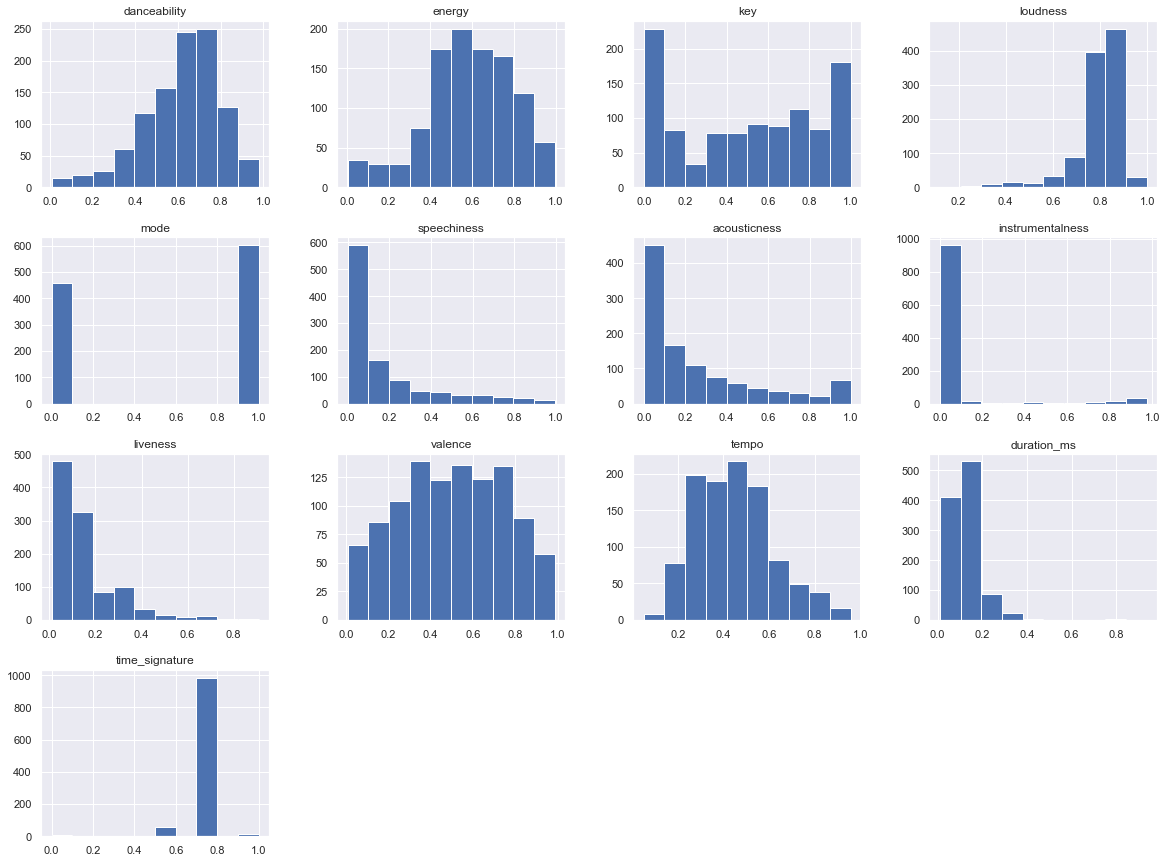

In [12]:
resampled_tracks_df.hist(figsize=(20,15));

Split data

In [13]:
# Feature variables
X = resampled_tracks_df.loc[:, resampled_tracks_df.columns != 'genre']
# Target variable
y = resampled_tracks_df['genre']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Decision Tree

In [15]:
dt_clf = DecisionTreeClassifier(random_state=1)
dt_clf = dt_clf.fit(X_train, y_train)

c:\Users\JD\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


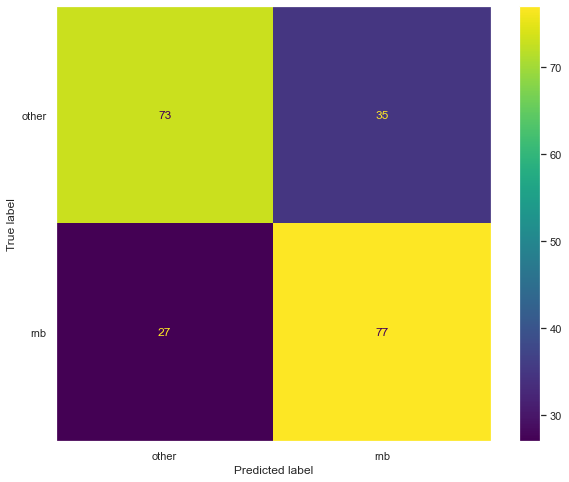

In [16]:
fig, ax = plt.subplots(figsize=(10,8))
plt.grid(False)
metrics.plot_confusion_matrix(dt_clf, X_test, y_test, display_labels=dt_clf.classes_, ax=ax);


Pruning decision tree

In [17]:
path = dt_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]

dt_clfs = []

for ccp_alpha in ccp_alphas:
    dt_clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    dt_clf.fit(X_train, y_train)
    dt_clfs.append(dt_clf)

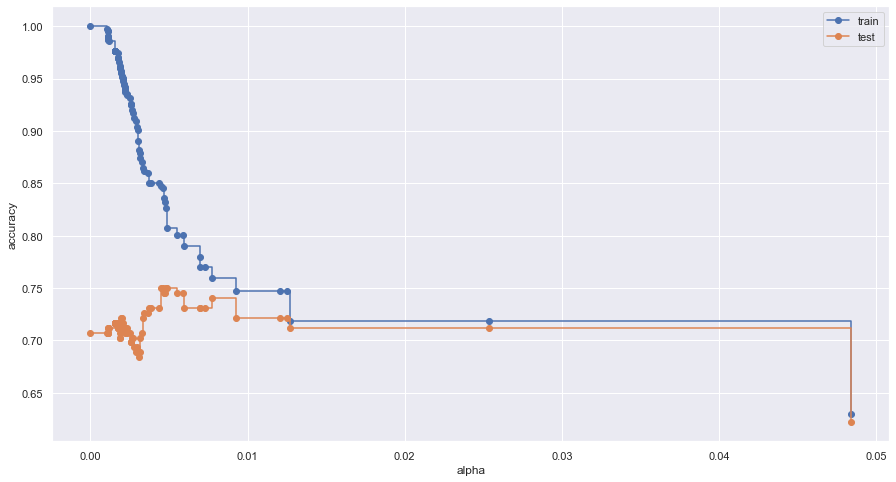

In [18]:
train_scores = [dt_clf.score(X_train, y_train) for dt_clf in dt_clfs]
test_scores = [dt_clf.score(X_test, y_test) for dt_clf in dt_clfs]

fig, ax = plt.subplots(figsize=(15,8))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()

In [19]:
best_ccp = ccp_alphas[np.argmax(test_scores)]
best_ccp

0.004465010288960375

Cross Validation

<AxesSubplot:xlabel='tree'>

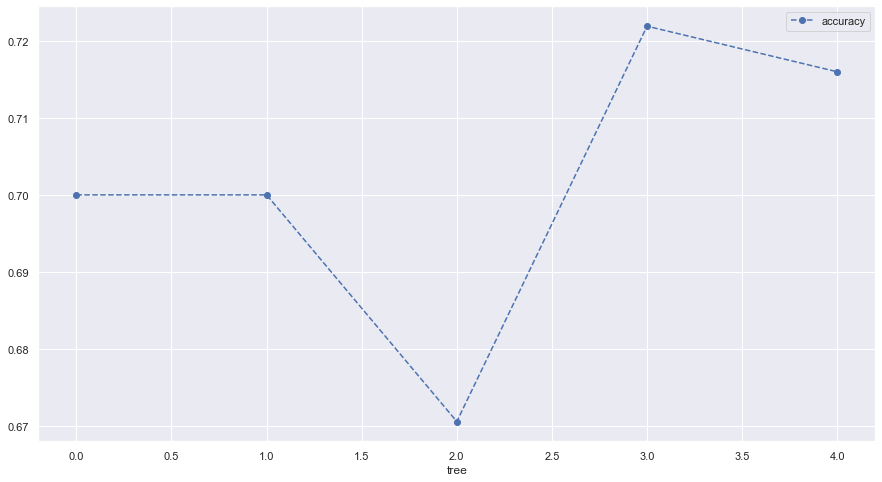

In [20]:
dt_clf = DecisionTreeClassifier(random_state=1, ccp_alpha=best_ccp)
scores = cross_val_score(dt_clf, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})
fig, ax = plt.subplots(figsize=(15,8))
df.plot(x='tree', y='accuracy', marker='o', linestyle='--', ax=ax)

Above shows alpha is sensitive to different training/testing data.

<AxesSubplot:xlabel='alpha'>

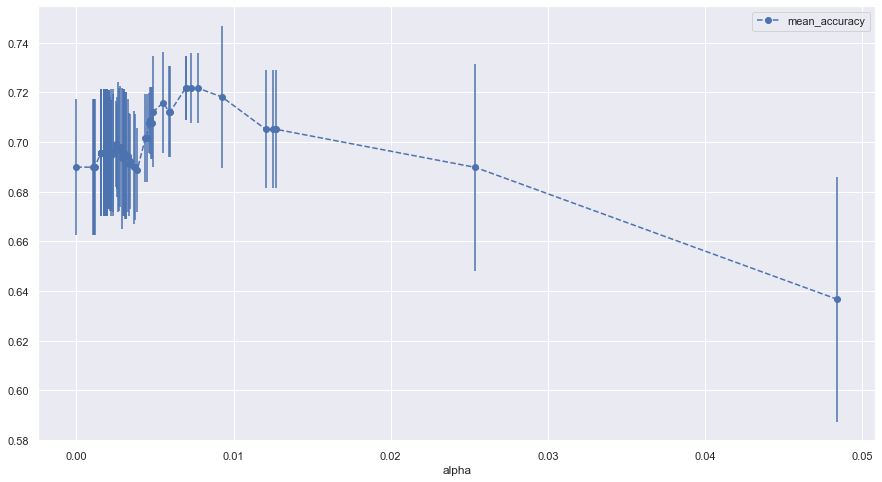

In [21]:
alpha_loop_values = []
for ccp_alpha in ccp_alphas:
    dt_clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    scores = cross_val_score(dt_clf, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy', 'std'])
fig, ax = plt.subplots(figsize=(15,8))
alpha_results.plot(x='alpha', y='mean_accuracy', yerr='std', marker='o', linestyle='--', ax=ax)

In [22]:
ideal_ccp = alpha_results.iloc[alpha_results['mean_accuracy'].idxmax()]['alpha']
ideal_ccp

0.006943564338673573

Building final tree

c:\Users\JD\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


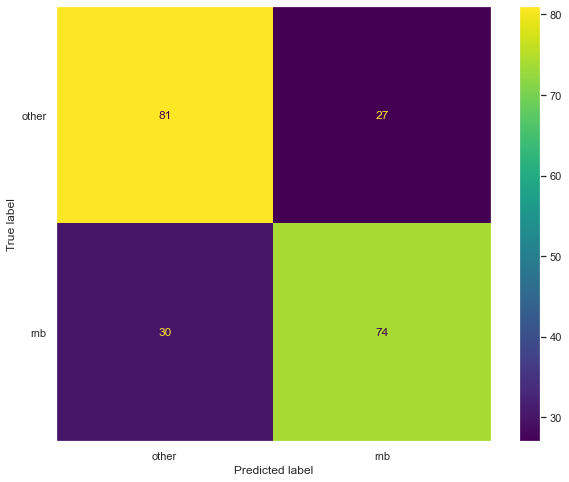

In [23]:
dt_clf_pruned = DecisionTreeClassifier(random_state=1, ccp_alpha=ideal_ccp)
dt_clf_pruned = dt_clf_pruned.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(10,8))
plt.grid(False)
metrics.plot_confusion_matrix(dt_clf_pruned, X_test, y_test, display_labels=dt_clf_pruned.classes_, ax=ax);

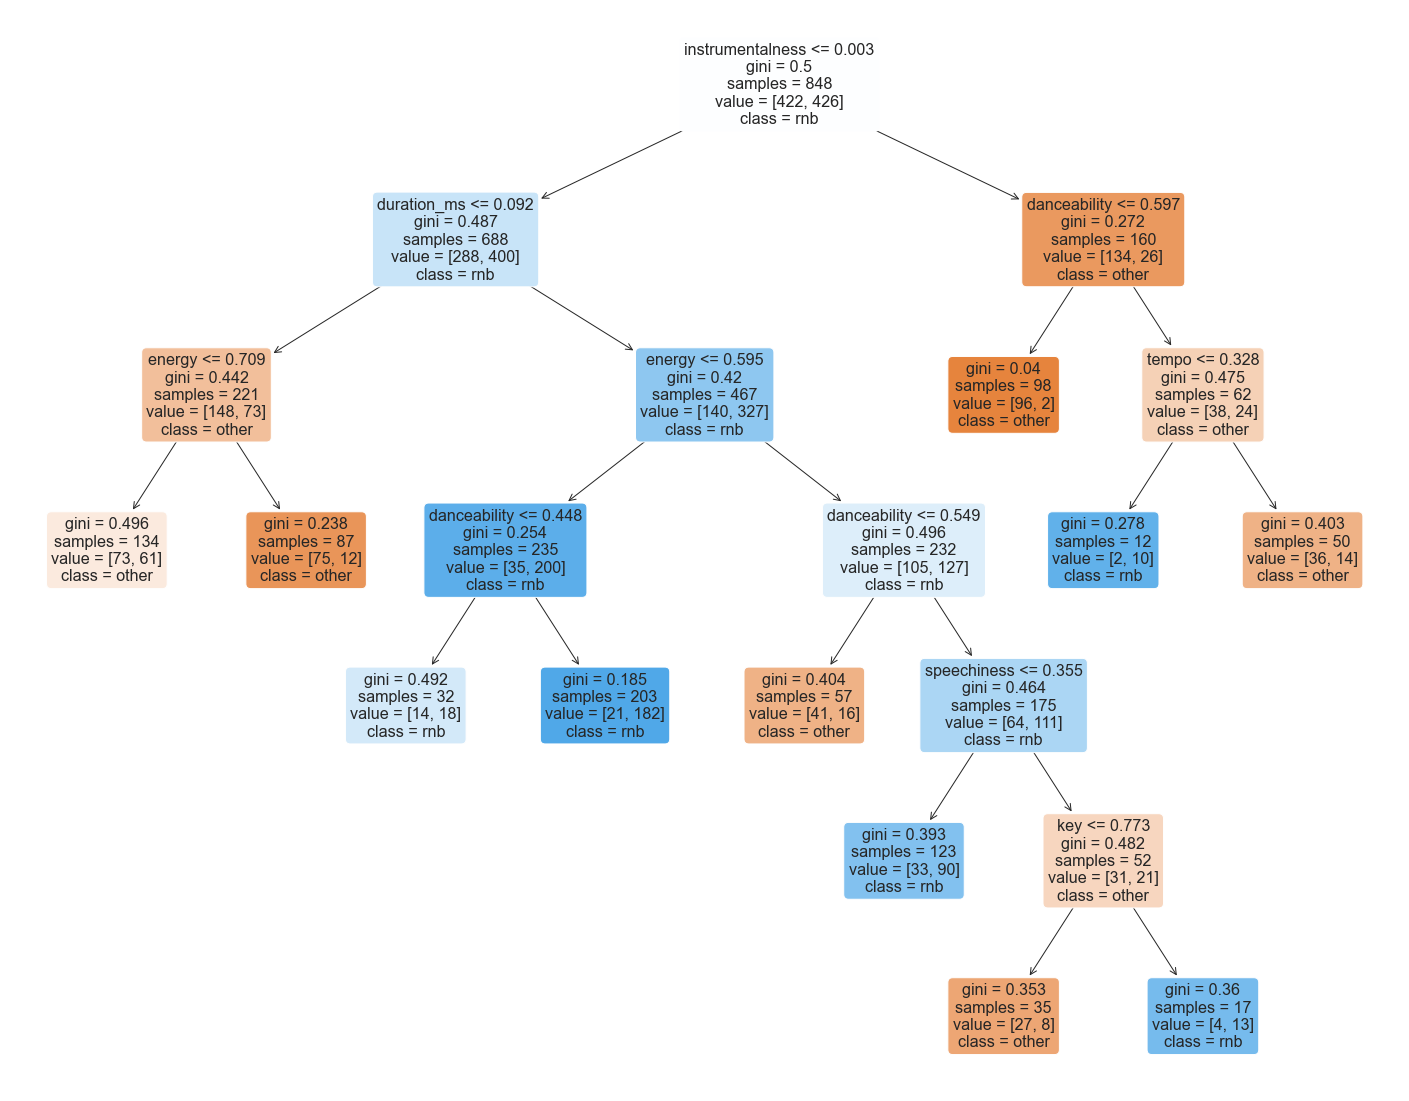

In [24]:
plt.figure(figsize=(25,20))
plot_tree(dt_clf_pruned, filled=True, rounded=True, class_names=dt_clf_pruned.classes_, feature_names=X.columns);

# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [26]:
df = pd.read_pickle("../data/spotify_dataset_all.pkl")
df.loc[df['genre'] != 'rnb', 'genre'] = 0
df.loc[df['genre'] == 'rnb', 'genre'] = 1
df['genre'] = df['genre'].astype(int)
pdf = df.loc[df['genre'] == 1].sample(n=530, random_state=1)
odf = df.loc[df['genre'] == 0].sample(n=530, random_state=1)
df = pd.concat([pdf, odf])
df

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
3TkNsftUBh8dwwLUHpmYNC,1,0.712,0.657,10,-5.888,0,0.1490,0.05770,0.000000,0.2340,0.437,97.993,249573,4
5S0cvScXb33JVpjTiY9Ivi,1,0.798,0.480,0,-5.564,1,0.0276,0.24700,0.000000,0.2370,0.643,108.241,255600,4
6mZI2vbLv1UvlclwDQ4uvc,1,0.698,0.662,7,-7.997,0,0.0861,0.56700,0.000001,0.0876,0.815,141.666,283701,4
741OE401HO7ZCaPhEqCZ7w,1,0.381,0.290,8,-10.682,1,0.0336,0.66200,0.000015,0.1060,0.151,113.318,240307,4
1Dx8rIZaXzZPvUQRF2j9hB,1,0.588,0.522,9,-6.254,0,0.0383,0.23300,0.000000,0.2400,0.584,66.024,290600,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1aPqexHVW20OTamBHdWWVL,0,0.953,0.652,11,-4.159,0,0.0849,0.00456,0.000000,0.0287,0.730,122.997,214787,4
0S8mtofOXVslUNzpHLuPW0,0,0.546,0.698,0,-4.678,1,0.0987,0.07590,0.000131,0.0613,0.616,72.417,234759,4
5KSJ9k1FYjFLnIRlJT2wF8,0,0.679,0.509,4,-7.310,1,0.0617,0.08560,0.000000,0.4380,0.534,144.290,223547,4
1VYHeY9ulPnsMHKvXPyG5H,0,0.545,0.709,8,-5.662,0,0.0428,0.02140,0.000000,0.1410,0.559,125.004,213164,4


In [27]:
X = df.loc[:, df.columns != 'genre']
y = df['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [28]:
lr = sm.Logit(y_train, X_train).fit()
lr.summary()

Optimization terminated successfully.
         Current function value: 0.531388
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  genre   No. Observations:                  848
Model:                          Logit   Df Residuals:                      835
Method:                           MLE   Df Model:                           12
Date:                Thu, 02 Jun 2022   Pseudo R-squ.:                  0.2334
Time:                        15:32:52   Log-Likelihood:                -450.62
converged:                       True   LL-Null:                       -587.78
Covariance Type:            nonrobust   LLR p-value:                 1.133e-51
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
danceability         2.5002      0.625      3.997      0.000       1.274       3.726
energy              -5.3277      0.749     -7.109      0.000      -6.797      -3.859
key                  0.0390      0.023      1.716      0.086      -0.006       0.084
loudness             0.1748      0.037      4.697      0.000       0.102       0.248
mode                -0.5209      0.167     -3.128      0.002      -0.847      -0.194
speechiness         -1.9079      0.962     -1.984      0.047      -3.793      -0.023
acousticness        -0.2934      0.421     -0.698      0.485      -1.118       0.531
instrumentalness   -12.8136      2.775     -4.618      0.000     -18.252      -7.376
liveness            -0.3210      0.629     -0.510      0.610      -1.554       0.912
valence              0.2947      0.442      0.666      0.505      -0.572       1.162
tempo               -0.0035      0.003     -1.263      0.207      -0.009       0.002
duration_ms       9.963e-06   1.49e-06      6.681      0.000    7.04e-06    1.29e-05
time_signature       0.3630      0.195      1.858      0.063      -0.020       0.746
====================================================================================
"""